<a href="https://colab.research.google.com/github/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_vi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Github Repository](https://)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

EXAMINE THE
TRANSACTION DATA

In [2]:
# import and load the transaction dataset
transaction = pd.read_excel("/content/drive/MyDrive/Data/Quantium Forage/QVI_transaction_data.xlsx")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
# making and using a copy of the dataset
df_transaction = transaction.copy()

In [4]:
# checking for null values in the transaction dataset
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

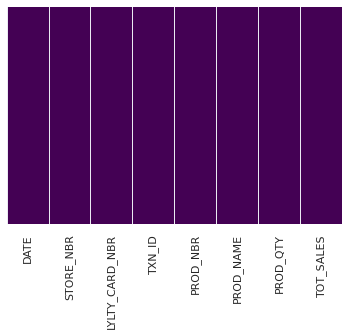

In [35]:
sns.heatmap(df_transaction.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [5]:
# checking how many rows and columns the dataset contains
df_transaction.shape

(264836, 8)

In [6]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [33]:
# checking if the columns have the correct datatypes
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [7]:
# checking the amount of unique values in each column
df_transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [8]:
# checking the amount of duplicate rows
df_transaction.duplicated(subset = None, keep = 'first').sum()


1

In [9]:
# we see that we have just one duplicated row
# then we can check the duplicated row
df_transaction[df_transaction.duplicated(subset = None, keep = 'first')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [10]:
# delete the duplicate rows
df_transaction.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [11]:
df_transaction
# looking at the dataframe now, the single duplicate row has been removed

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [12]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


EXAMINE THE CUSTOMER DATA

In [13]:
# # import and load the customer dataset
customer = pd.read_csv("/content/drive/MyDrive/Data/Quantium Forage/QVI_purchase_behaviour.csv")
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [14]:
df_customer = customer.copy()

In [15]:
# check for null values in the dataset
df_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

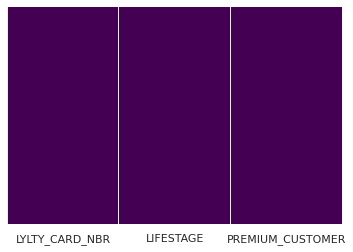

In [36]:
sns.heatmap(df_customer.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [16]:
# check the amount of row and column in the dataframe
df_customer.shape

(72637, 3)

In [17]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# checking if the columns have the correct datatypes
df_customer.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [18]:
# checking the amount of unique values in each column
df_customer.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [19]:
# checking the amount of duplicate rows in the dataframe
df_customer.duplicated(subset = None, keep = 'first').sum()
# we see that we have no duplicates in the dataset

0

In [20]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


MERGING THE DATASET

In [27]:
df_merged = pd.merge(df_transaction, df_customer, on='LYLTY_CARD_NBR', how='left')
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [28]:
df_chips = df_merged.copy()

In [29]:
# check for null values
df_chips.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

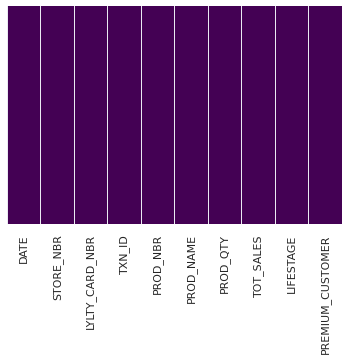

In [41]:
sns.heatmap(df_chips.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [30]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [34]:
df_chips.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')